In [31]:
import sys
import os

# Caminho absoluto da raiz do projeto
project_root = os.path.abspath(os.path.join('..'))  # sobe uma pasta
sys.path.append(project_root)




In [32]:
from src.database import load_training_data
from src.preprocessing import preprocess_data
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Carrega os dados
df = load_training_data()

2026-02-26 18:08:22,263 - INFO - src.database - Iniciando carregamento dos dados...
2026-02-26 18:08:22,265 - INFO - src.database - Criando engine de conexão com o banco...
2026-02-26 18:08:22,270 - INFO - src.database - Engine criada com sucesso.
2026-02-26 18:08:23,980 - INFO - src.database - Dados carregados com sucesso. Shape: (10415, 20)


In [34]:
# Pré-processa e separa em X e y
X, y = preprocess_data(df)

2026-02-26 18:08:24,008 - INFO - src.preprocessing - Iniciando pré-processamento...
2026-02-26 18:08:24,018 - WARNING - src.preprocessing - Colunas ausentes ignoradas: {'FAIXA_PRAZO_FINANCIAMENTO'}
2026-02-26 18:08:24,241 - INFO - src.preprocessing - Pré-processamento finalizado. X: (10415, 566), y: (10415,)
2026-02-26 18:08:24,283 - INFO - src.preprocessing - Total de NaNs restantes: 0


In [35]:
# Agora df continua sendo o DataFrame original
df.head()  

,NUMERO_CONTRATO,DATA_ASSINATURA_CONTRATO,TIPO_FINANCIAMENTO,TAXA_AO_ANO,PZ_FINANCIAMENTO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,INADIMPLENTE_COBRANCA
0,41637,2012-03-23,IMOBILIARIO,15.0,180,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,73767.0,471.29,70.0,SIM
1,67958,2012-01-24,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,323251.0,1858.69,28.0,SIM
2,68502,2014-05-23,IMOBILIARIO,18.0,200,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,529419.0,3123.57,60.0,SIM
3,68731,2015-10-23,IMOBILIARIO,15.0,200,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,499753.0,2873.58,41.0,SIM
4,68996,2017-01-24,IMOBILIARIO,17.0,200,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,722057.0,4224.03,63.0,SIM


In [36]:
# Analisando os dados missing podemos constatar o seguinte:
# Variavel DADE_DATA_ASSINATURA_CONTRATO possui 1 registro
# Variavel VL_TOTAL_PC_PAGAS possui 4 registros

# Como temos um total de 10.415 observações então excluir 5 observações NÃO afetará nosso trabalho

df.isnull().sum()

NUMERO_CONTRATO                   0
DATA_ASSINATURA_CONTRATO          0
TIPO_FINANCIAMENTO                0
TAXA_AO_ANO                       0
PZ_FINANCIAMENTO                  0
CIDADE_CLIENTE                    0
ESTADO_CLIENTE                    0
RENDA_MENSAL_CLIENTE              0
QT_PC_ATRASO                      0
QT_DIAS_PRIM_PC_ATRASO            0
QT_TOTAL_PC_PAGAS                 0
VL_TOTAL_PC_PAGAS                 4
QT_PC_PAGA_EM_DIA                 0
QT_DIAS_MIN_ATRASO                0
QT_DIAS_MAX_ATRASO                0
QT_DIAS_MEDIA_ATRASO              0
VALOR_FINANCIAMENTO               0
VALOR_PARCELA                     0
IDADE_DATA_ASSINATURA_CONTRATO    1
INADIMPLENTE_COBRANCA             0
dtype: int64

In [37]:
#Informações básicas sobre tipos de variáveis
df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NUMERO_CONTRATO                 10415 non-null  int64  
 1   DATA_ASSINATURA_CONTRATO        10415 non-null  object 
 2   TIPO_FINANCIAMENTO              10415 non-null  str    
 3   TAXA_AO_ANO                     10415 non-null  float64
 4   PZ_FINANCIAMENTO                10415 non-null  int64  
 5   CIDADE_CLIENTE                  10415 non-null  str    
 6   ESTADO_CLIENTE                  10415 non-null  str    
 7   RENDA_MENSAL_CLIENTE            10415 non-null  float64
 8   QT_PC_ATRASO                    10415 non-null  int64  
 9   QT_DIAS_PRIM_PC_ATRASO          10415 non-null  int64  
 10  QT_TOTAL_PC_PAGAS               10415 non-null  int64  
 11  VL_TOTAL_PC_PAGAS               10411 non-null  float64
 12  QT_PC_PAGA_EM_DIA               10415 non-n

In [38]:
# Avaliar o período dos dados coletados
import pandas as pd

inicio = pd.to_datetime(df['DATA_ASSINATURA_CONTRATO']).dt.date.min()
fim = pd.to_datetime(df['DATA_ASSINATURA_CONTRATO']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2012-01-10 Até: 2022-11-14


In [39]:
# Total de valores únicos de cada variável
# A variável TIPO_FINANCIAMENTO possuI valor unico, então será retirada do nosso DataFrame

valores_unicos = []
for i in df.columns[0:20].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

NUMERO_CONTRATO : 10415
DATA_ASSINATURA_CONTRATO : 1070
TIPO_FINANCIAMENTO : 1
TAXA_AO_ANO : 111
PZ_FINANCIAMENTO : 9
CIDADE_CLIENTE : 525
ESTADO_CLIENTE : 27
RENDA_MENSAL_CLIENTE : 7
QT_PC_ATRASO : 130
QT_DIAS_PRIM_PC_ATRASO : 227
QT_TOTAL_PC_PAGAS : 137
VL_TOTAL_PC_PAGAS : 9860
QT_PC_PAGA_EM_DIA : 129
QT_DIAS_MIN_ATRASO : 122
QT_DIAS_MAX_ATRASO : 534
QT_DIAS_MEDIA_ATRASO : 323
VALOR_FINANCIAMENTO : 834
VALOR_PARCELA : 1826
IDADE_DATA_ASSINATURA_CONTRATO : 78
INADIMPLENTE_COBRANCA : 2


In [40]:
# Visualizando algumas medidas estatisticas
df.describe()

,NUMERO_CONTRATO,TAXA_AO_ANO,PZ_FINANCIAMENTO,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_FINANCIAMENTO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO
count,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10411.000000,10415.000000,10415.000000,10415.000000,10415.000000,1.041500e+04,10415.000000,10414.000000
mean,95569.356889,17.271483,114.242535,5620.259241,16.716179,664.389438,35.946711,44528.545631,27.667115,6.115699,79.133845,28.841863,3.255909e+05,3617.341097,40.789418
std,34561.658949,2.566596,64.330109,2930.301113,30.706681,1181.352716,28.384415,65640.970502,25.153443,82.908021,334.871089,137.395374,1.774775e+05,1932.714754,12.390906
min,32709.000000,7.000000,48.000000,1800.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,2.932700e+04,185.740000,0.000000
25%,75868.500000,16.000000,72.000000,1800.000000,0.000000,0.000000,11.000000,8675.445000,7.000000,0.000000,0.000000,0.000000,2.100000e+05,2467.755000,31.250000
50%,79111.000000,17.000000,72.000000,7800.000000,0.000000,0.000000,33.000000,24345.600000,22.000000,1.000000,8.000000,4.000000,2.800000e+05,3470.590000,39.000000
75%,136637.500000,19.000000,180.000000,7800.000000,22.000000,1005.500000,54.000000,46787.290000,42.000000,3.000000,62.000000,22.000000,3.929738e+05,4930.245000,49.000000
max,155890.000000,25.500000,240.000000,9800.000000,178.000000,5655.000000,167.000000,714499.740000,136.000000,5465.000000,5710.000000,5480.000000,1.400000e+06,14410.000000,118.000000


In [41]:
print('Maior Valor Financiado:', df['VALOR_FINANCIAMENTO'].max())
print('Menor Valor Financiado:', df['VALOR_FINANCIAMENTO'].min())

Maior Valor Financiado: 1400000.0
Menor Valor Financiado: 29327.0


In [42]:
# A variavel alvo precisará ser balanceada na etapa de pré-processamento
df.groupby(['INADIMPLENTE_COBRANCA']).size()

INADIMPLENTE_COBRANCA
NAO    2377
SIM    8038
dtype: int64

In [43]:
df.groupby(['PZ_FINANCIAMENTO']).size()

PZ_FINANCIAMENTO
48      343
72     6122
100     939
160       2
180     765
194       2
200     558
220     774
240     910
dtype: int64

In [44]:
df.groupby(['RENDA_MENSAL_CLIENTE']).size()

RENDA_MENSAL_CLIENTE
1800.0    3512
3800.0      33
4800.0     416
5800.0    1039
6800.0     130
7800.0    4306
9800.0     979
dtype: int64

In [45]:
# Observe que temos uma variedade muito grande de valor financiado, neste caso devemos criar um range de valores
df.groupby(['VALOR_FINANCIAMENTO']).size()

VALOR_FINANCIAMENTO
29327.00       1
31421.00       3
39915.00       7
42574.00       7
45396.25       1
              ..
1260000.00     1
1280223.00     1
1367884.00     4
1378692.00     1
1400000.00    10
Length: 834, dtype: int64

In [46]:
# Variavel DATA_ASSINATURA_CONTRATO possui 1 registro
# Variavel VL_TOTAL_PC_PAGAS possui 4 registros

# Excluindo os registros NA (5 registros)
df.dropna(inplace=True)

In [47]:
# Criando faixa de prazos para utilizarmos no modelo preditivo

# Criar faixas
bins = [0, 120, 180, 240]
labels = ['Até 120 Meses', '121 até 180 Meses', '181 até 240 Meses']
df['FAIXA_PRAZO_FINANCIAMENTO'] = pd.cut(df['PZ_FINANCIAMENTO'], bins=bins, labels=labels)

# Contagem de cada faixa
df['FAIXA_PRAZO_FINANCIAMENTO'].value_counts()

FAIXA_PRAZO_FINANCIAMENTO
Até 120 Meses        7402
181 até 240 Meses    2241
121 até 180 Meses     767
Name: count, dtype: int64

In [48]:
# Criando faixa salarial para utilizarmos no modelo preditivo
bins = [-100, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 9000000000]
labels = ['Até 100 mil', '101 até 200 mil', '201 até 300 mil', '301 até 400 mil', '401 até 500 mil', 
          '501 até 750 mil', 'De 751 até 1.000.000','Mais de 1.000.000']
df['FAIXA_VALOR_FINANCIADO'] = pd.cut(df['VALOR_FINANCIAMENTO'], bins=bins, labels=labels)
df['FAIXA_VALOR_FINANCIADO'].value_counts()

FAIXA_VALOR_FINANCIADO
201 até 300 mil         3949
301 até 400 mil         2098
101 até 200 mil         1823
401 até 500 mil         1128
501 até 750 mil          915
De 751 até 1.000.000     236
Até 100 mil              167
Mais de 1.000.000         94
Name: count, dtype: int64

In [49]:
# Podemos retirar a variável TIPO FINANCIAMENTO como vimos anteriormente
# Devemos retirar a variável VALOR_FINANCIAMENTO pois criamos uma variavel de faixa de valores para ela.
# Devemos retirar a variável PRAZO_FINANCIAMENTO pois criamos uma variavel de faixa de meses para ela.
# Podemos retirar a variável DATA_ASSINATURA_CONTRATO
# Podemos retirar a variável NUMERO_CONTRATO

colunas = ['TAXA_AO_ANO', 'CIDADE_CLIENTE', 'ESTADO_CLIENTE','RENDA_MENSAL_CLIENTE', 
           'QT_PC_ATRASO', 'QT_DIAS_PRIM_PC_ATRASO','QT_TOTAL_PC_PAGAS',
           'VL_TOTAL_PC_PAGAS', 'QT_PC_PAGA_EM_DIA','QT_DIAS_MIN_ATRASO',
           'QT_DIAS_MAX_ATRASO', 'QT_DIAS_MEDIA_ATRASO','VALOR_PARCELA',
           'IDADE_DATA_ASSINATURA_CONTRATO', 'FAIXA_VALOR_FINANCIADO',
           'FAIXA_PRAZO_FINANCIAMENTO','INADIMPLENTE_COBRANCA']

df_dados = pd.DataFrame(df, columns=colunas)

df_dados.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_VALOR_FINANCIADO,FAIXA_PRAZO_FINANCIAMENTO,INADIMPLENTE_COBRANCA
0,15.0,FORTALEZA,CE,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,Até 100 mil,121 até 180 Meses,SIM
1,15.0,SAO PAULO,SP,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,301 até 400 mil,181 até 240 Meses,SIM
2,18.0,SAO PAULO,SP,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,501 até 750 mil,181 até 240 Meses,SIM
3,15.0,SAO PAULO,SP,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,401 até 500 mil,181 até 240 Meses,SIM
4,17.0,SAO PAULO,SP,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,501 até 750 mil,181 até 240 Meses,SIM


In [50]:
df_dados.shape

(10410, 17)

In [51]:
df_dados.info(verbose=True)

<class 'pandas.DataFrame'>
Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   TAXA_AO_ANO                     10410 non-null  float64 
 1   CIDADE_CLIENTE                  10410 non-null  str     
 2   ESTADO_CLIENTE                  10410 non-null  str     
 3   RENDA_MENSAL_CLIENTE            10410 non-null  float64 
 4   QT_PC_ATRASO                    10410 non-null  int64   
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64   
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64   
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64 
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64   
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64   
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64   
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64   
 12  VALOR_PARCELA                   10

In [52]:
df_dados.isnull().sum()

TAXA_AO_ANO                       0
CIDADE_CLIENTE                    0
ESTADO_CLIENTE                    0
RENDA_MENSAL_CLIENTE              0
QT_PC_ATRASO                      0
QT_DIAS_PRIM_PC_ATRASO            0
QT_TOTAL_PC_PAGAS                 0
VL_TOTAL_PC_PAGAS                 0
QT_PC_PAGA_EM_DIA                 0
QT_DIAS_MIN_ATRASO                0
QT_DIAS_MAX_ATRASO                0
QT_DIAS_MEDIA_ATRASO              0
VALOR_PARCELA                     0
IDADE_DATA_ASSINATURA_CONTRATO    0
FAIXA_VALOR_FINANCIADO            0
FAIXA_PRAZO_FINANCIAMENTO         0
INADIMPLENTE_COBRANCA             0
dtype: int64

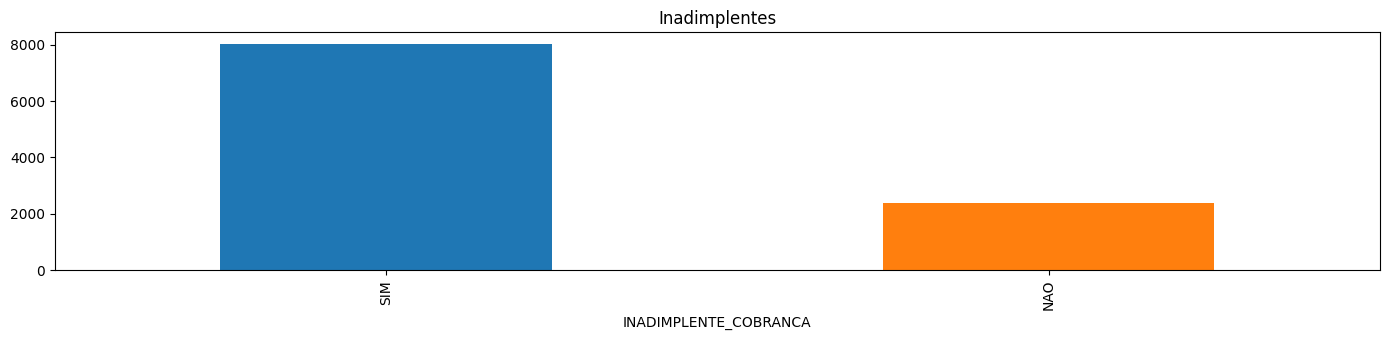

In [53]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais cotas como INADIMPLENTE
#dessa forma, precisaremos balancear o dataset mais adiante.
df_dados.INADIMPLENTE_COBRANCA.value_counts().plot(kind='bar', title='Inadimplentes',color = ['#1F77B4', '#FF7F0E']);

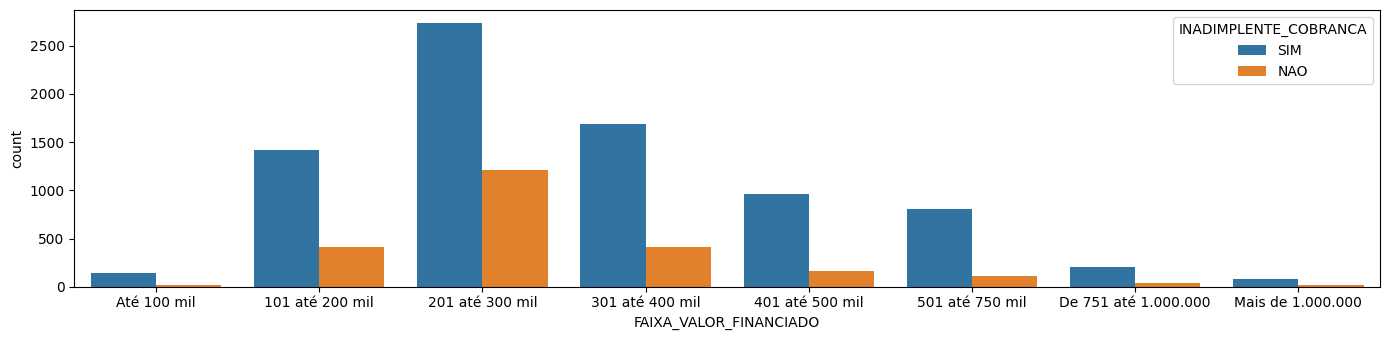

In [54]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

plt.rcParams["figure.figsize"] = [14.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_dados, x = "FAIXA_VALOR_FINANCIADO", hue = "INADIMPLENTE_COBRANCA")
plt.show()

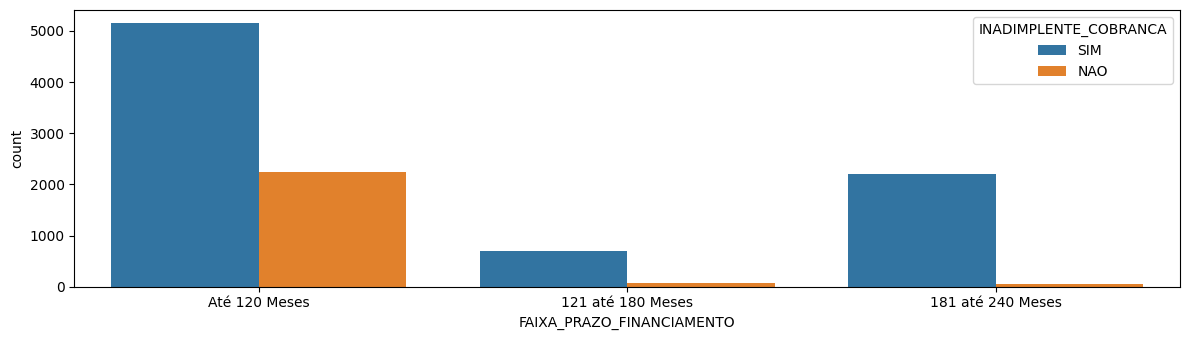

In [55]:
#Podemos constatar na analise que não há discrepancias nestas variaveis

plt.rcParams["figure.figsize"] = [12.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_dados, x = "FAIXA_PRAZO_FINANCIAMENTO", hue = "INADIMPLENTE_COBRANCA")
plt.show()

In [56]:
df_dados.info()

<class 'pandas.DataFrame'>
Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   TAXA_AO_ANO                     10410 non-null  float64 
 1   CIDADE_CLIENTE                  10410 non-null  str     
 2   ESTADO_CLIENTE                  10410 non-null  str     
 3   RENDA_MENSAL_CLIENTE            10410 non-null  float64 
 4   QT_PC_ATRASO                    10410 non-null  int64   
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64   
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64   
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64 
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64   
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64   
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64   
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64   
 12  VALOR_PARCELA                   10

In [57]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df_dados.columns[0:17].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i) 

In [58]:
#Visualizando as variáveis numéricas
variaveis_numericas

['TAXA_AO_ANO',
 'RENDA_MENSAL_CLIENTE',
 'QT_PC_ATRASO',
 'QT_DIAS_PRIM_PC_ATRASO',
 'QT_TOTAL_PC_PAGAS',
 'VL_TOTAL_PC_PAGAS',
 'QT_PC_PAGA_EM_DIA',
 'QT_DIAS_MIN_ATRASO',
 'QT_DIAS_MAX_ATRASO',
 'QT_DIAS_MEDIA_ATRASO',
 'VALOR_PARCELA',
 'IDADE_DATA_ASSINATURA_CONTRATO']

In [59]:
#Quantidade de variaveis
len(variaveis_numericas)

12

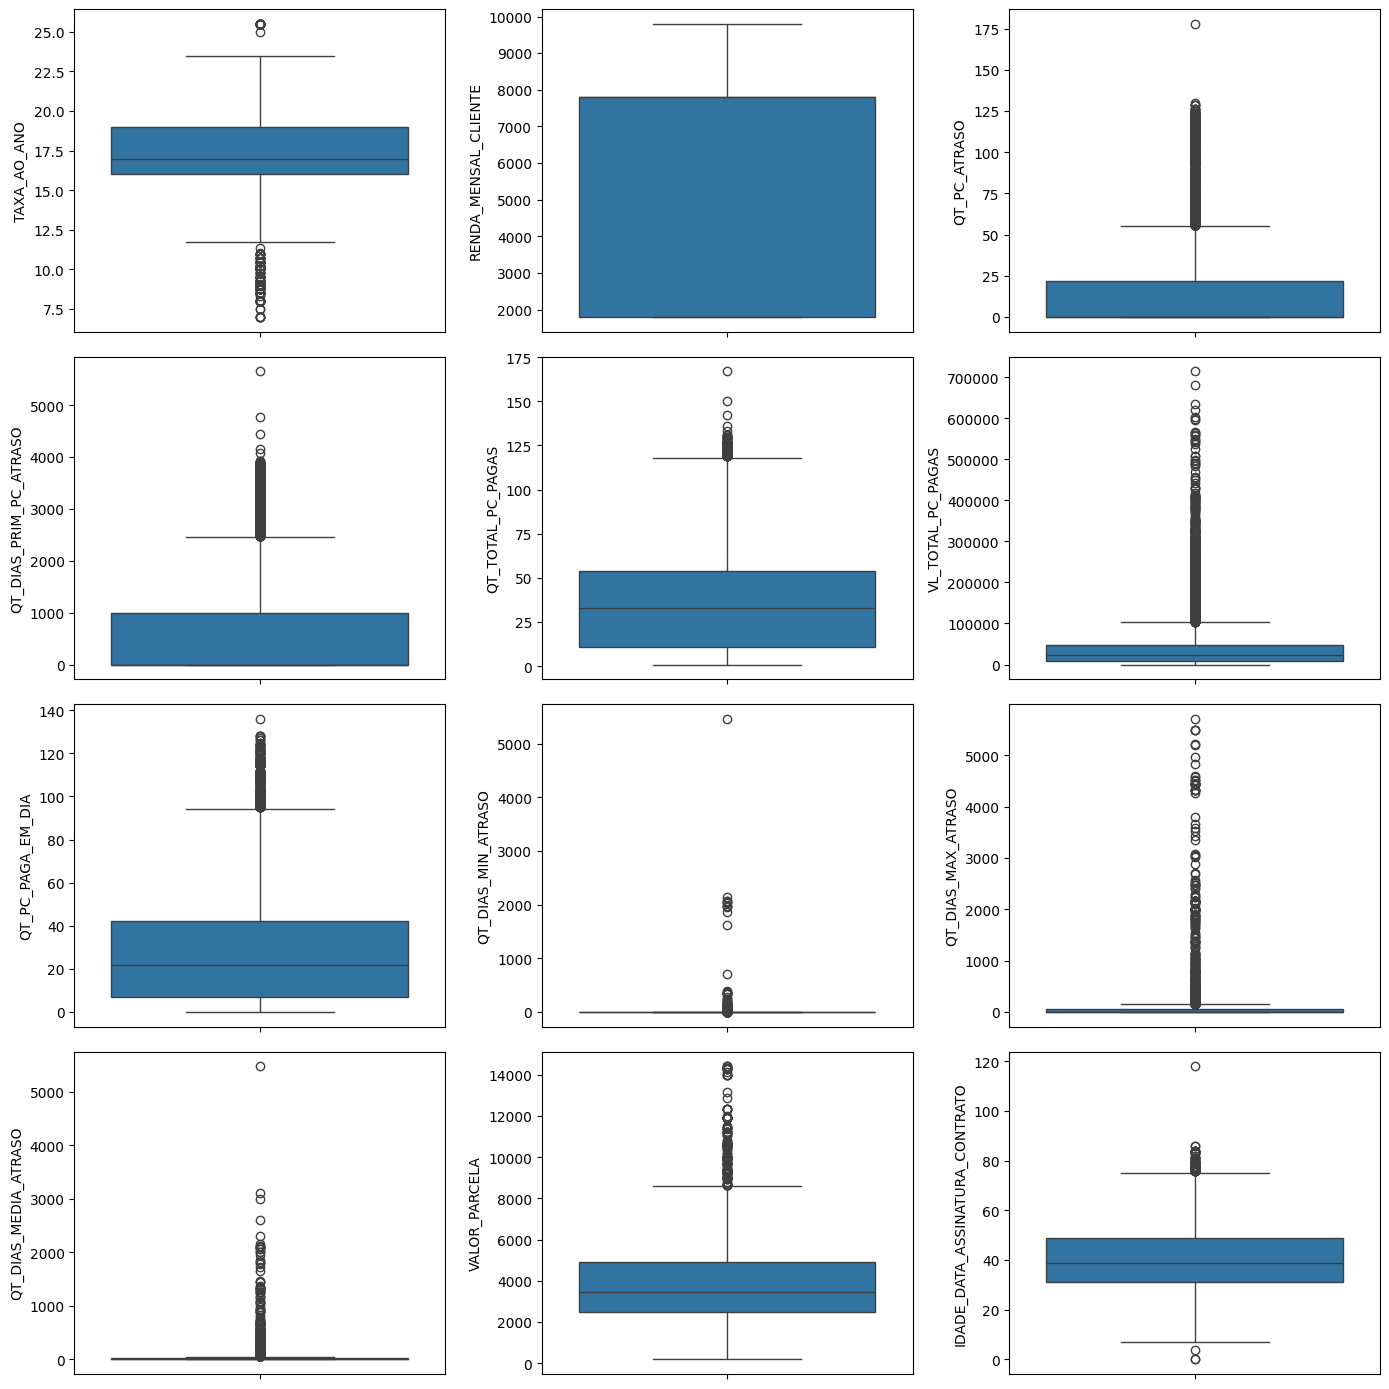

In [60]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

In [81]:
# carregar variaveis categoricas para OneHotEncoding
# Colocamos o SLICE até 16 porque NÃO precisamos fazer OneHotEncoding para variavel TARGET
# Seleciona todas as colunas categóricas até a coluna 16 (excluindo a target)

variaveis_categoricas = df_dados.iloc[:, 0:16].select_dtypes(include=['object', 'category']).columns.tolist()

df_dados['INADIMPLENTE_COBRANCA'] = df_dados['INADIMPLENTE_COBRANCA'].astype('object')

In [82]:
# Visualizando as variaveis categoricas
variaveis_categoricas

[]

In [83]:
# Cria o encoder e aplica OneHotEncoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [84]:
df_dados.head()

,TAXA_AO_ANO,CIDADE_CLIENTE,ESTADO_CLIENTE,RENDA_MENSAL_CLIENTE,QT_PC_ATRASO,QT_DIAS_PRIM_PC_ATRASO,QT_TOTAL_PC_PAGAS,VL_TOTAL_PC_PAGAS,QT_PC_PAGA_EM_DIA,QT_DIAS_MIN_ATRASO,QT_DIAS_MAX_ATRASO,QT_DIAS_MEDIA_ATRASO,VALOR_PARCELA,IDADE_DATA_ASSINATURA_CONTRATO,FAIXA_VALOR_FINANCIADO,FAIXA_PRAZO_FINANCIAMENTO,INADIMPLENTE_COBRANCA
0,15.0,152,5,4800.0,0,0,97,120078.00,72,3,506,152,471.29,70.0,5,0,SIM
1,15.0,453,25,6800.0,0,0,103,156759.47,42,1,349,93,1858.69,28.0,2,1,SIM
2,18.0,453,25,6800.0,0,0,98,277125.05,83,1,151,39,3123.57,60.0,4,1,SIM
3,15.0,453,25,6800.0,0,0,87,351395.19,66,1,3797,206,2873.58,41.0,3,1,SIM
4,17.0,453,25,6800.0,0,0,71,344249.83,57,1,36,10,4224.03,63.0,4,1,SIM


In [85]:
df_dados.info()

<class 'pandas.DataFrame'>
Index: 10410 entries, 0 to 10414
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TAXA_AO_ANO                     10410 non-null  float64
 1   CIDADE_CLIENTE                  10410 non-null  int64  
 2   ESTADO_CLIENTE                  10410 non-null  int64  
 3   RENDA_MENSAL_CLIENTE            10410 non-null  float64
 4   QT_PC_ATRASO                    10410 non-null  int64  
 5   QT_DIAS_PRIM_PC_ATRASO          10410 non-null  int64  
 6   QT_TOTAL_PC_PAGAS               10410 non-null  int64  
 7   VL_TOTAL_PC_PAGAS               10410 non-null  float64
 8   QT_PC_PAGA_EM_DIA               10410 non-null  int64  
 9   QT_DIAS_MIN_ATRASO              10410 non-null  int64  
 10  QT_DIAS_MAX_ATRASO              10410 non-null  int64  
 11  QT_DIAS_MEDIA_ATRASO            10410 non-null  int64  
 12  VALOR_PARCELA                   10410 non-null  